<a href="https://colab.research.google.com/github/SarahSouzaPontes/-front-integral-position-propagacao/blob/main/Serie_Temporal(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Série Temporal:


In [6]:
#carregando dataset


import pandas as pd
url = 'https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/timeline.csv'
df_time = pd.read_csv(url)
df_time.head()


,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [15]:
#carregando dataset


import pandas as pd
url = 'https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/shampoo.csv'
df_shampoo = pd.read_csv(url)
df_shampoo.head()


,Month,Sales
0,2000-01,266.0
1,2000-02,145.9
2,2000-03,183.1
3,2000-04,119.3
4,2000-05,180.3


In [212]:
#carregando dataset


import pandas as pd
url = 'https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/clima_india.csv'
df_clima = pd.read_csv(url)
df_clima.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [278]:
#carregando dataset


import pandas as pd
url = 'https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/fire.csv'
df_fire = pd.read_csv(url)
df_fire.head()


,state,number,Month
0,Acre,0.0,1998-1
1,Acre,0.0,1999-1
2,Acre,0.0,2000-1
3,Acre,0.0,2001-1
4,Acre,0.0,2002-1


In [75]:
#Importando dos pacotes
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.tree import DecisionTreeRegressor
import pandas_datareader.data as web

In [17]:
df_time.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [18]:
#decsrição das variáveis.
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-null    object
 1   diet     168 non-null    int64 
 2   gym      168 non-null    int64 
 3   finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [20]:
#transformar a coluna em data
df_time.month = pd.to_datetime(df_time.month)
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


In [40]:
#índice é incrmental, logo a coluna month transformando em index:
df_time.set_index("month", inplace = True)

In [41]:
#Numpay + Pandas => funcionalidade de datas: lista
pd.to_datetime(['01/01/2019', '01/02/2019', '01/03/2019'])

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03'], dtype='datetime64[ns]', freq=None)

In [42]:
#variável timestemp
pd.to_datetime(['01/01/2019'])

DatetimeIndex(['2019-01-01'], dtype='datetime64[ns]', freq=None)

In [43]:
#Formatando data:
pd.to_datetime(['01/01/2019', '01/02/2019', '01/03/2019']).format =('%d/%m/%Y')

In [44]:
#decsrição das variáveis com index:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     168 non-null    int64
 1   gym      168 non-null    int64
 2   finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


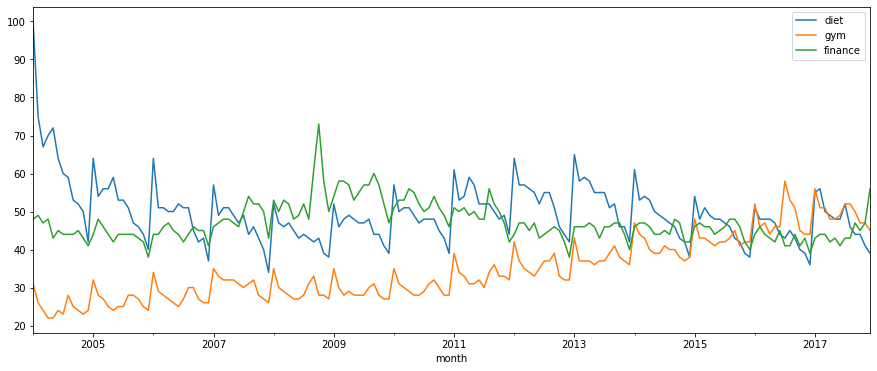

In [45]:
#Série temporal é descrito em gráfico de linhas
df_time.plot(figsize= (15,6))

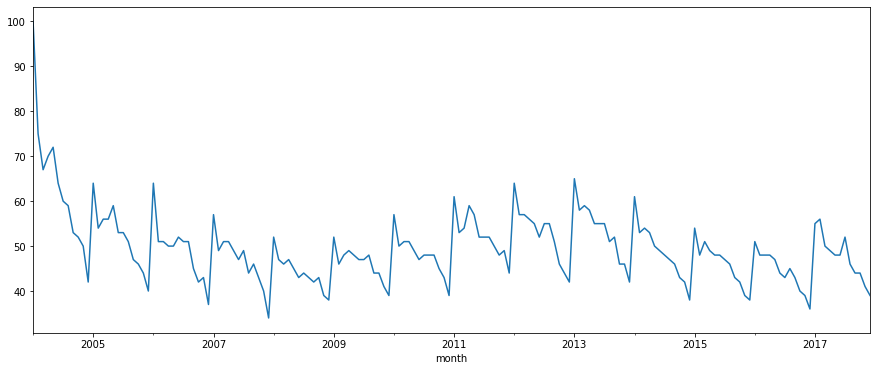

In [46]:
#Analisar série temporal, filtrando 1 série das 3:
#componente de tendência:
df_time.diet.plot (figsize= (15,6))

In [47]:
#Ruído, precisa eliminar ruído aplicar média movel(12 meses, média):
#Média movel apenas consegue calcular no mês 12, por isso alguns pode dar NaN:
df_time.diet.rolling(12).mean()

month
2004-01-01          NaN
2004-02-01          NaN
2004-03-01          NaN
2004-04-01          NaN
2004-05-01          NaN
                ...    
2017-08-01    46.833333
2017-09-01    46.916667
2017-10-01    47.250000
2017-11-01    47.416667
2017-12-01    47.666667
Name: diet, Length: 168, dtype: float64

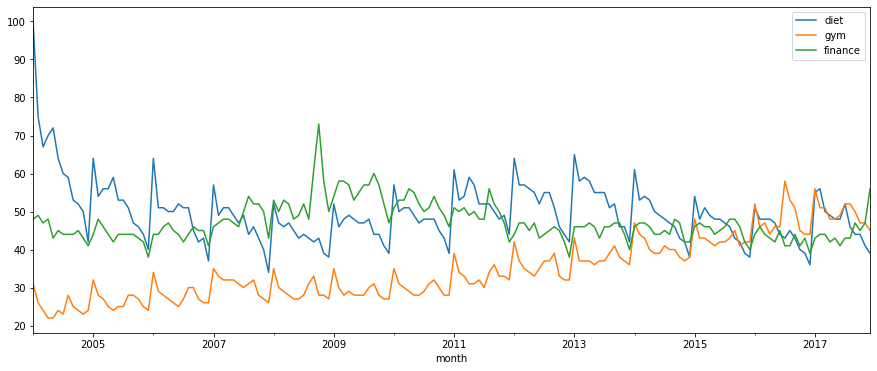

In [48]:
#Efeito no gráfico da média móvel é uma curva mais suave.
df_time.plot(figsize= (15,6))

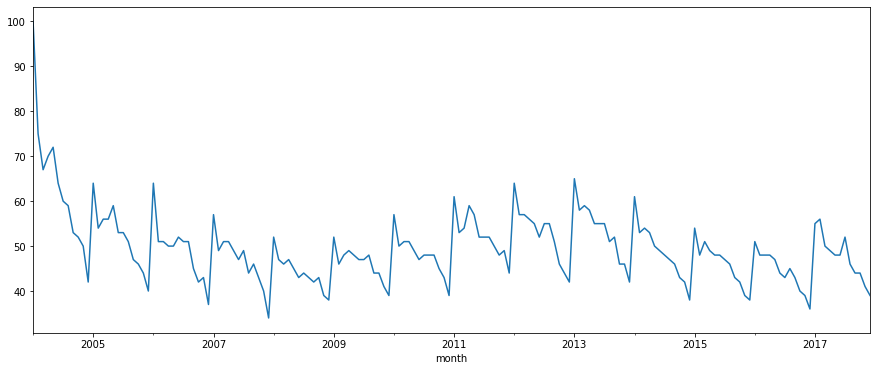

In [52]:
df_time.diet.plot(figsize= (15,6))

In [50]:
#agrupar apenas o resultado em anos e somando
df_time.diet.groupby(df_time.index.year)

In [76]:
#man - Média movel
df_time.diet.rolling(12).mean().head(12)

month
2004-01-01          NaN
2004-02-01          NaN
2004-03-01          NaN
2004-04-01          NaN
2004-05-01          NaN
2004-06-01          NaN
2004-07-01          NaN
2004-08-01          NaN
2004-09-01          NaN
2004-10-01          NaN
2004-11-01          NaN
2004-12-01    63.666667
Name: diet, dtype: float64

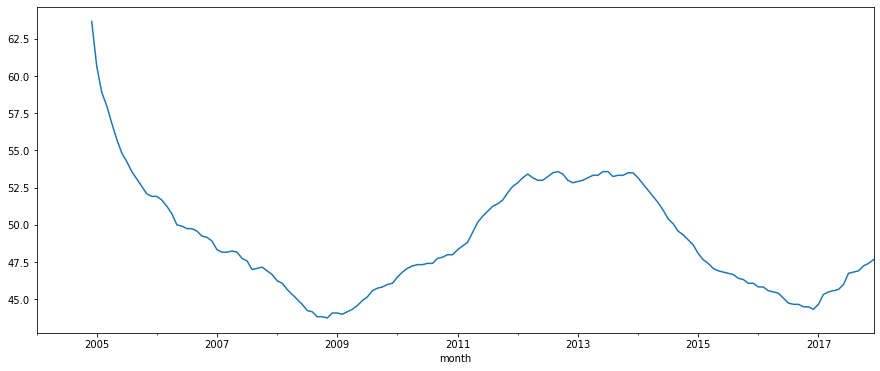

In [56]:
#man - Média movel
df_time.diet.rolling(12).mean().plot(figsize=(15,6))

In [58]:
#Plotando
#agrupando por ano
df_time.diet.groupby(df_time.index.year).sum()

month
2004    764
2005    623
2006    587
2007    560
2008    529
2009    553
2010    576
2011    631
2012    634
2013    642
2014    584
2015    553
2016    532
2017    572
Name: diet, dtype: int64

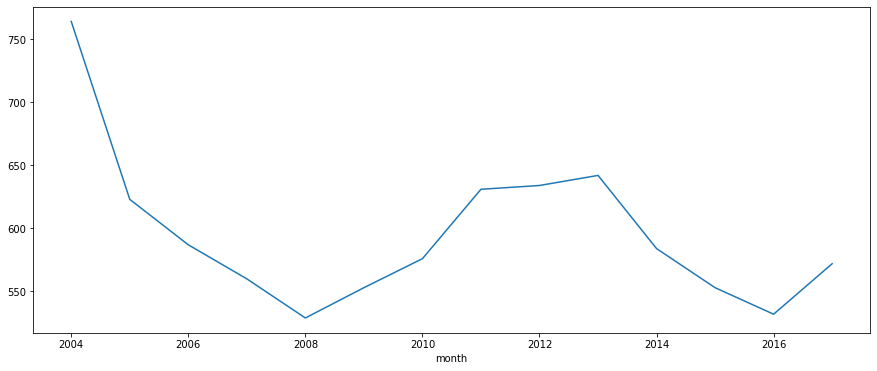

In [61]:
df_time.diet.groupby(df_time.index.year).sum().plot(figsize =(15,6))

In [62]:
#Analizar sazonalidade:
#Aplicar diferenças sucessivas: 
df_time.diet.diff()

month
2004-01-01     NaN
2004-02-01   -25.0
2004-03-01    -8.0
2004-04-01     3.0
2004-05-01     2.0
              ... 
2017-08-01    -6.0
2017-09-01    -2.0
2017-10-01     0.0
2017-11-01    -3.0
2017-12-01    -2.0
Name: diet, Length: 168, dtype: float64

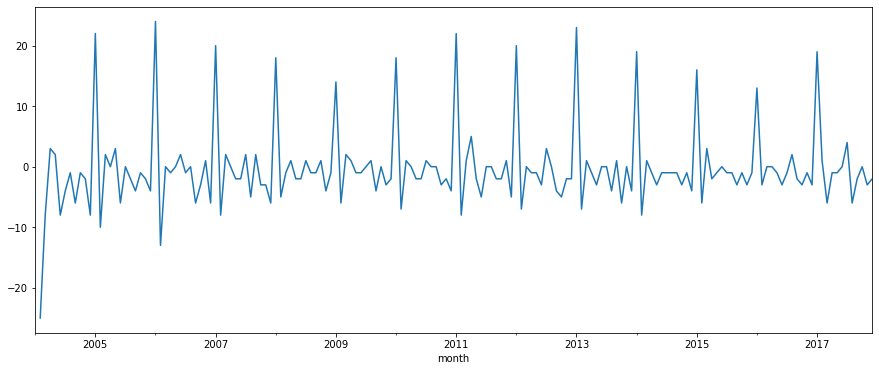

In [63]:
#Plotando
df_time.diet.diff().plot(figsize= (15,6))

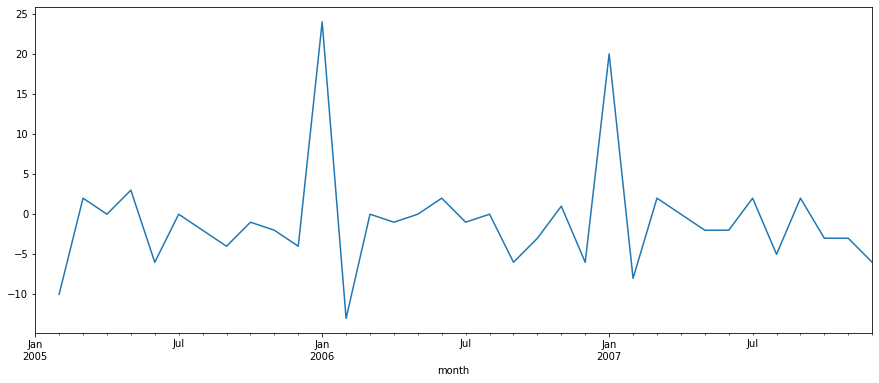

In [66]:
#Criando filtro ano
filtro = (df_time. index.year >= 2005) & (df_time.index.year <=2007)
df_time[filtro].diet.diff().plot(figsize= (15,6))

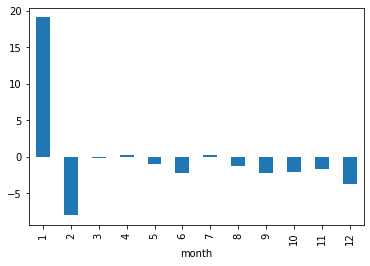

In [73]:
#agrupando por mes, diff calculando diferenças
#jan crescimento
df_time.diet.diff().groupby(df_time.index.month).mean().plot(kind = 'bar')

In [70]:
#Não foi especificado hora, logo a saída será "0"
pd.to_datetime(np.datetime64('2019-01-01'))

Timestamp('2019-01-01 00:00:00')

In [97]:
pd.to_datetime(datetime.datetime(2019,1,1))

Timestamp('2019-01-01 00:00:00')

In [94]:
#Calculando datas => dia da semana
dia = pd.Timestamp('2018-01-05')
dia.day_name()

'Friday'

In [98]:
#Soma-se 1 dia no resultado da função criada, dia.
dia2 = dia + pd.Timedelta('1 day')
dia2.day_name()

'Saturday'

In [99]:
#Dias da semana:
dia + pd.offsets.BDay(1)
#somando quantidade de dia úteis

Timestamp('2018-01-08 00:00:00')

####Lista de datas, frequência fixa que a série se repete:
####primeiro mês  eprimeiro dia, já que não especificou
###https://pandas.pydata.org-docs/stable/user_guide/timeseries.html#offset-aliases

In [102]:
pd.date_range('2019', freq = 'D', periods = 365)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [105]:
#Guardar na variável: index.
index = pd.date_range('2019', freq= 'D', periods = 365)

In [108]:
#Lista de valores com valores comportamento de distribuição normal com média 10 e dp =2
values = np.random.normal(10,2,365)
#array, vetor com 365 valores dferentes

In [109]:
#passando valores, nome do parâmetro = nome da variável
td = pd.Series(values, index = index)

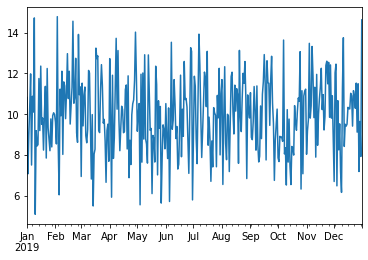

In [110]:
#Série estacionária
td.plot()

In [115]:
#Converter frequências
index = pd.date_range('2091', freq = 'H', periods = 10)
#Em hora

In [116]:
#valores de 0 até 9, incremental
ts = pd.Series(range(len(index)), index = index)
ts

2091-01-01 00:00:00    0
2091-01-01 01:00:00    1
2091-01-01 02:00:00    2
2091-01-01 03:00:00    3
2091-01-01 04:00:00    4
2091-01-01 05:00:00    5
2091-01-01 06:00:00    6
2091-01-01 07:00:00    7
2091-01-01 08:00:00    8
2091-01-01 09:00:00    9
Freq: H, dtype: int64

In [117]:
#mudar de 1 em 1 hr para 2 em 2hrs - média
ts.resample('2H').mean()

2091-01-01 00:00:00    0.5
2091-01-01 02:00:00    2.5
2091-01-01 04:00:00    4.5
2091-01-01 06:00:00    6.5
2091-01-01 08:00:00    8.5
Freq: 2H, dtype: float64

In [118]:
#mudar de 1 em 1 hr para 2 em 2hrs - somar
ts.resample('2H').sum()


2091-01-01 00:00:00     1
2091-01-01 02:00:00     5
2091-01-01 04:00:00     9
2091-01-01 06:00:00    13
2091-01-01 08:00:00    17
Freq: 2H, dtype: int64

In [119]:
#mudar de 1 em 1 hr para 2 em 2hrs - média, não pode trazer a média em alguns valores, entre 0 e 1 interpolate não fica valor vazio
ts.resample('0.5H').mean(). interpolate

<bound method Series.interpolate of 2091-01-01 00:00:00    0.0
2091-01-01 00:30:00    NaN
2091-01-01 01:00:00    1.0
2091-01-01 01:30:00    NaN
2091-01-01 02:00:00    2.0
2091-01-01 02:30:00    NaN
2091-01-01 03:00:00    3.0
2091-01-01 03:30:00    NaN
2091-01-01 04:00:00    4.0
2091-01-01 04:30:00    NaN
2091-01-01 05:00:00    5.0
2091-01-01 05:30:00    NaN
2091-01-01 06:00:00    6.0
2091-01-01 06:30:00    NaN
2091-01-01 07:00:00    7.0
2091-01-01 07:30:00    NaN
2091-01-01 08:00:00    8.0
2091-01-01 08:30:00    NaN
2091-01-01 09:00:00    9.0
Freq: 30T, dtype: float64>

###PREDIÇÃO


In [121]:
#Modelo Naive - exemplo mais "inocente" de preditor para série temporal.
df_shampoo.Month = pd.to_datetime(df_shampoo.Month)
df_shampoo.set_index('Month', inplace= True)
df_shampoo.head()

,Sales
Month,
2000-01-01,266.0
2000-02-01,145.9
2000-03-01,183.1
2000-04-01,119.3
2000-05-01,180.3


In [122]:
#Interesse modelar as vendas
#Desloca dados para um período
df_shampoo['naive'] = df_shampoo.Sales.shift(1)
df_shampoo.head()
# modelo preditivo e o real

,Sales,naive
Month,,
2000-01-01,266.0,NaN
2000-02-01,145.9,266.0
2000-03-01,183.1,145.9
2000-04-01,119.3,183.1
2000-05-01,180.3,119.3


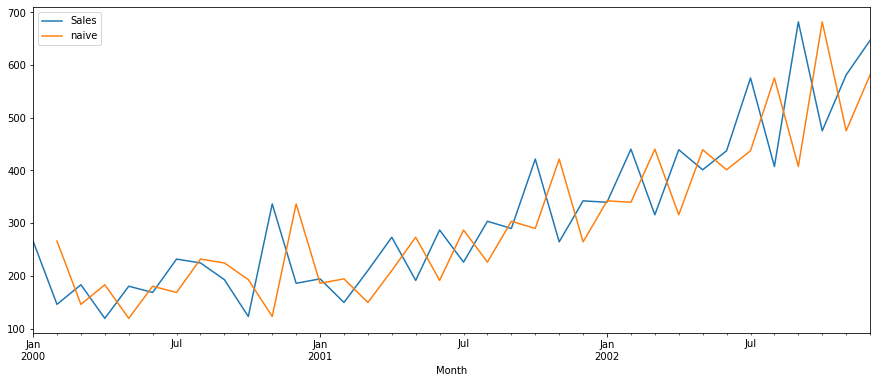

In [123]:
#Modelo em laranja
#Valor real em azul
df_shampoo.plot(figsize =(15,6))

In [128]:
#Fazer validação
#Sales e Previsão, calcular o erro médio quadrático entre a previsão e os valores calculados
((df_shampoo.Sales - df_shampoo.naive) ** 2).mean()

11715.388285714287

In [129]:
#Modelo AutoRegressivo
df_shampoo['x1'] = df_shampoo.Sales.shift(1)
df_shampoo.dropna(axis = 0, inplace = True) #eliminando os valores de janeiro, pois a regressão não aceita valores nulos
df_shampoo.head()

,Sales,naive,x1
Month,,,
2000-02-01,145.9,266.0,266.0
2000-03-01,183.1,145.9,145.9
2000-04-01,119.3,183.1,183.1
2000-05-01,180.3,119.3,119.3
2000-06-01,168.5,180.3,180.3


In [133]:
X = df_shampoo.x1.values
y = df_shampoo.Sales.values


In [134]:
reg = LinearRegression().fit(X.reshape(-1,1),y)
previsoes = reg.predict(X.reshape(-1, 1))
((y - previsoes) **2).mean()

10668.73613429366

Text(0, 0.5, 'Sales')

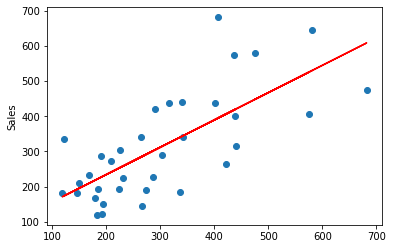

In [138]:
#Comportamento linear, plotado.
plt.scatter(X, y)
plt.plot(X,reg.predict(X.reshape(-1,1)), color = 'red')
plt.ylabel('Sales')

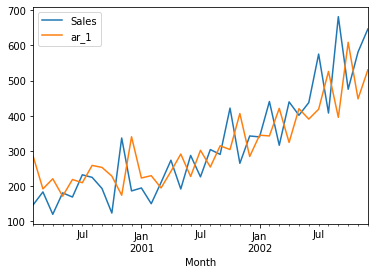

In [142]:
df_shampoo['ar_1'] = previsoes
df_shampoo[['Sales', 'ar_1']].plot()

##MODELO 2

In [144]:
ar_2.resid

Month
2000-04-01    -55.274811
2000-05-01     -6.028636
2000-06-01     15.113551
2000-07-01     34.634339
2000-08-01     19.693569
2000-09-01    -58.741871
2000-10-01   -114.660602
2000-11-01    141.763899
2000-12-01    -11.493226
2001-01-01   -127.540448
2001-02-01    -58.782340
2001-03-01      7.187940
2001-04-01     88.829219
2001-05-01    -56.343653
2001-06-01     12.293343
2001-07-01    -10.984782
2001-08-01      9.226340
2001-09-01     21.933331
2001-10-01     97.594267
2001-11-01    -83.744514
2001-12-01    -65.713875
2002-01-01     31.918520
2002-02-01     73.495131
2002-03-01    -75.592447
2002-04-01      3.262965
2002-05-01     28.394550
2002-06-01    -20.338321
2002-07-01    137.443745
2002-08-01    -94.669177
2002-09-01    117.892742
2002-10-01    -32.177668
2002-11-01    -82.554463
2002-12-01    113.963382
dtype: float64

In [146]:
ar_2.resid** 2 #erro quadratico

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Month
2000-04-01     3055.304736
2000-05-01       36.344448
2000-06-01      228.419437
2000-07-01     1199.537415
2000-08-01      387.836650
2000-09-01     3450.607389
2000-10-01    13147.053653
2000-11-01    20097.003015
2000-12-01      132.094235
2001-01-01    16266.565957
2001-02-01     3455.363484
2001-03-01       51.666477
2001-04-01     7890.630234
2001-05-01     3174.607247
2001-06-01      151.126279
2001-07-01      120.665427
2001-08-01       85.125353
2001-09-01      481.070987
2001-10-01     9524.640955
2001-11-01     7013.143688
2001-12-01     4318.313374
2002-01-01     1018.791928
2002-02-01     5401.534340
2002-03-01     5714.218084
2002-04-01       10.646944
2002-05-01      806.250467
2002-06-01      413.647311
2002-07-01    18890.783015
2002-08-01     8962.253017
2002-09-01    13898.698538
2002-10-01     1035.402331
2002-11-01     6815.239283
2002-12-01    12987.652545
dtype: float64

In [147]:
(ar_2.resid ** 2). mean() #erro quadratico medio

5158.249643789199

In [148]:
#Série do pandas:
ar_2.resid.describe() #média próxima a 0,
# é bom, diz que o modelo não é tendencioso
# quartis sem tendencia

count    3.300000e+01
mean    -2.601017e-13
std      7.293453e+01
min     -1.275404e+02
25%     -5.874187e+01
50%      3.262965e+00
75%      3.191852e+01
max      1.417639e+02
dtype: float64

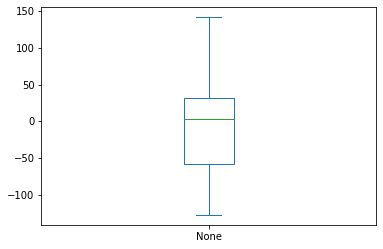

In [149]:
#boxplot
ar_2.resid.plot(kind = 'box')


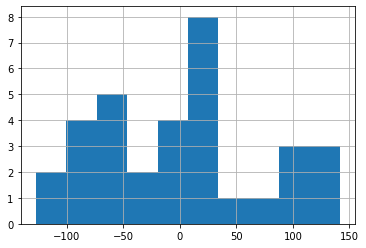

In [150]:
#confirmando no histograma
ar_2.resid.hist()

In [154]:
#MODELO 3

ar_3 = AR(df_shampoo.Sales,freq = 'MS').fit(3)
(ar_3.resid ** 2).mean()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
/usr/lo

4238.657615211386

In [156]:
df_shampoo['ar_3'] = ar_3.predict()

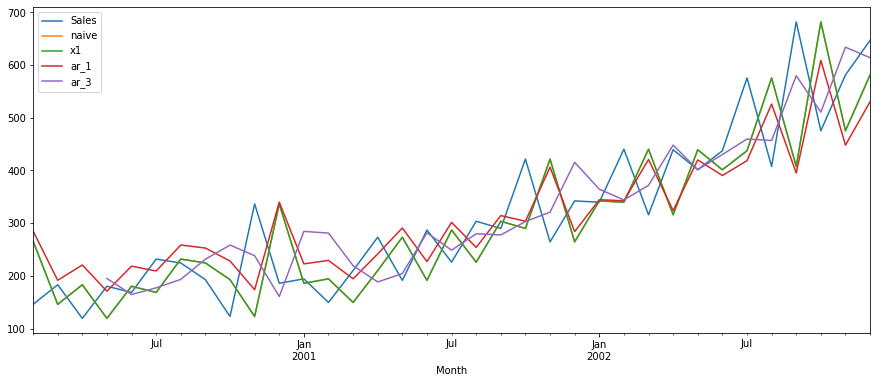

In [157]:
#plotar
df_shampoo.plot(figsize = (15,6))
#modelo de ordem 3 o melhor até o momento

In [158]:
#previsao para o próximo período:
#final é Dezembro de 2002 então iremos prever janeiro de 2003
df_shampoo.tail()

,Sales,naive,x1,ar_1,ar_3
Month,,,,,
2002-08-01,407.6,575.5,575.5,526.001132,456.811972
2002-09-01,682.0,407.6,407.6,395.311771,579.873025
2002-10-01,475.3,682.0,682.0,608.898196,510.758354
2002-11-01,581.3,475.3,475.3,448.007838,633.954394
2002-12-01,646.9,581.3,581.3,530.515714,614.045822


In [159]:
#Previsão de fevereiro utiliza a saída, ou seja depende do período anterior.
ar_3.predict(start ='2003-01-01', end= '2003-01-01')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2003-01-01    584.912224
Freq: MS, dtype: float64

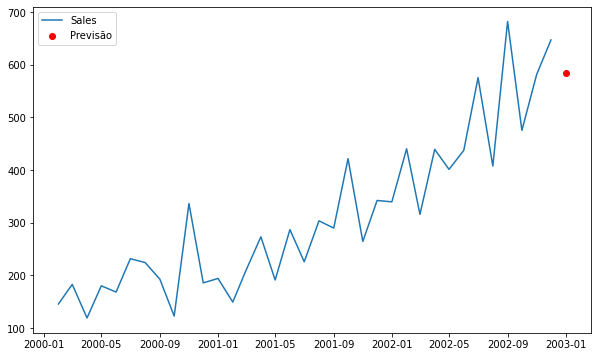

In [162]:
#visualizando
plt.figure(figsize=(10,6))
plt.plot(df_shampoo.Sales)
forecast = ar_3.predict(start='2003-01', end='2003-01')
plt.scatter(forecast.index, forecast.values, color = 'red')
plt.legend(['Sales', 'Previsão'])

In [172]:
#Autocorrelação Total e parcial
#analisa 2 variáveis
#-1 a 1, próximo de 0 não tem autocorrelação;
#carregando dataset


import pandas as pd
url = 'https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/shampoo.csv'
df_shampoo = pd.read_csv(url)
df_shampoo.head()
df_shampoo.Month = pd.to_datetime(df_shampoo.Month)

In [174]:
#índice é incrmental, logo a coluna month transformando em index:
df_shampoo.set_index("Month", inplace = True)

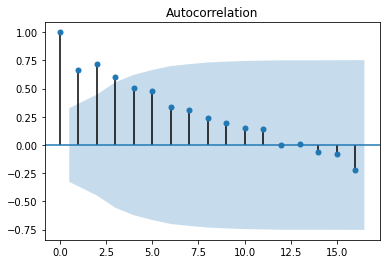

In [175]:
#Gráfico da autocorrelação total
plot_acf(df_shampoo.Sales)
plt.show()
#área azul = autocorrelação é 0 então devemos pegar números fora dessa área

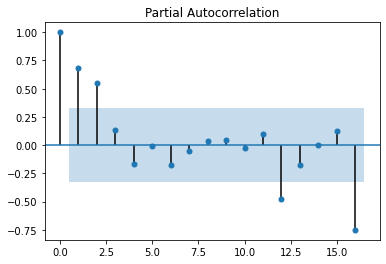

In [176]:
#Gráfico da autocorrelação parcial
plot_pacf(df_shampoo.Sales)
plt.show()

In [181]:
#modelo de validação
model = AR(df_shampoo.Sales, freq = 'MS').fit(2)

In [182]:
#Validação Train/Test -> pode ser tambem ser assim
#pode ter overfitting
train_size = int(len(df_shampoo.Sales)* 2/3)
train_size
#conjunto completo

24

In [189]:
#primeiros registros
train_set = df_shampoo.Sales[:train_size]
#todos valores do início até train_size

In [185]:
#conjunto complementar
#do train_size até o final
test_set = df_shampoo.Sales[train_size:]

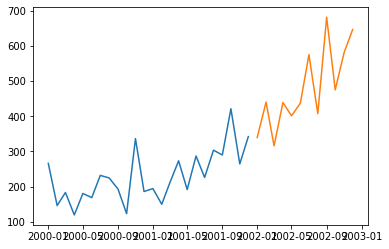

In [190]:
plt.plot(train_set)
plt.plot(test_set)

In [191]:
ar_2 = AR(train_set, freq = 'MS').fit(2)
ar_2.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


const       82.005541
L1.Sales     0.183201
L2.Sales     0.488723
dtype: float64

In [193]:
#previsoes do teste
previsoes = ar_2.params[0]+ar_2.params[1]*test_set.shift(1)+ar_2.params[2]*test_set.shift(2)

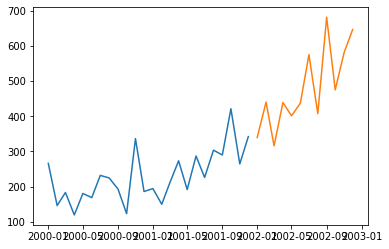

In [194]:
#Modelo não satisfatório
plt.plot(train_set)
plt.plot(test_set)

#Calculando erro para ratificar
#Não é um valor absoluto vai usar como referência

In [203]:
ar_5 = AR(train_set, freq='MS').fit(5)
ar_5.params

const       0.986921
L1.Sales   -0.065935
L2.Sales    0.288687
L3.Sales    0.092468
L4.Sales    0.547897
L5.Sales    0.287857
dtype: float64

In [205]:
previsoes = ar_5.params[0]

In [207]:
ar_5 = AR(train_set, freq='MS').fit(5)
ar_5.params

previsoes = ar_5.params[0]
for i, coef in enumerate(ar_5.params[1:]):
  previsoes+= coef * test_set.shift(i+1)
  
previsoes

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Month
2002-01-01           NaN
2002-02-01           NaN
2002-03-01           NaN
2002-04-01           NaN
2002-05-01           NaN
2002-06-01    469.636779
2002-07-01    428.470876
2002-08-01    458.045403
2002-09-01    527.023131
2002-10-01    482.070272
2002-11-01    645.445731
2002-12-01    551.919198
Name: Sales, dtype: float64

In [209]:
#erro medio quadratico
((test_set - previsoes) ** 2).mean()

8914.457999953871

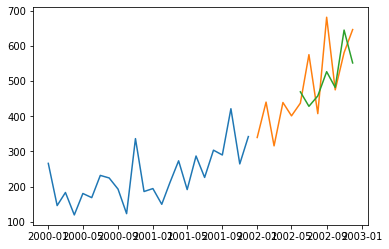

In [210]:
#grafico
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsoes)

In [213]:
#Modelo Auto-regressivo Médias Móveis (ARMA)
#captar ruído na série
#transformação em datetime da coluna data.
df_clima.date = pd.to_datetime(df_clima.date)
df_clima.set_index('date', inplace = True)
df_clima.head()
#temperatura, umidade, velocidade do vento e a pressão.

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


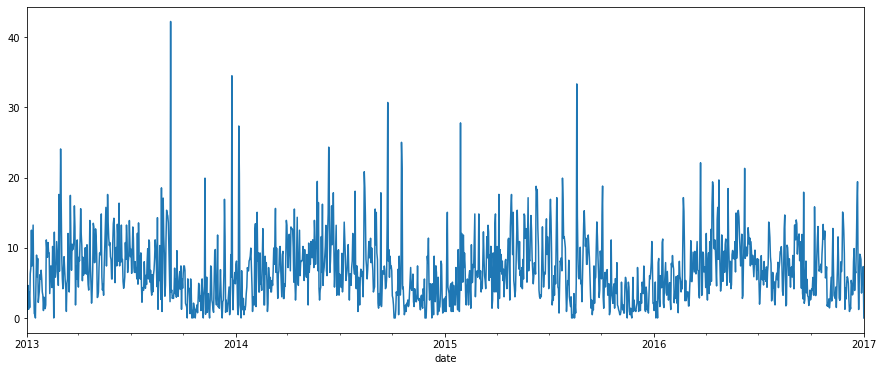

In [214]:
#gráfico da velocidade do vento para cada dia do ano:
df_clima.wind_speed.plot(figsize=(15,6))

In [218]:
#todas datas
df_clima.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [219]:
#Criando modelo ARMA
arma = ARMA(df_clima.wind_speed, freq = 'D', order = (2,2)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


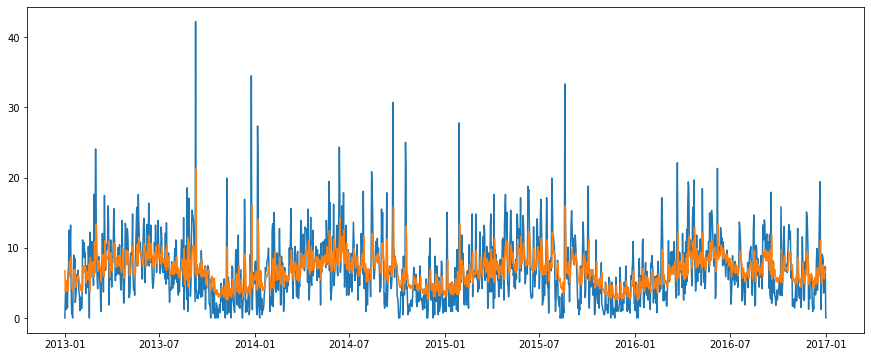

In [220]:
#Plotando
plt.figure(figsize = (15,6))
plt.plot(df_clima.wind_speed)
plt.plot(arma.predict())

In [233]:
#Treinamento e teste
#Visualizando tamnanho
n = len(df_clima.wind_speed)
train_size = int(n * 2/3)
# tamanho do treinamento 2/3
train_set = df_clima.wind_speed[:train_size]
test_set = df_clima.wind_speed[train_size:]

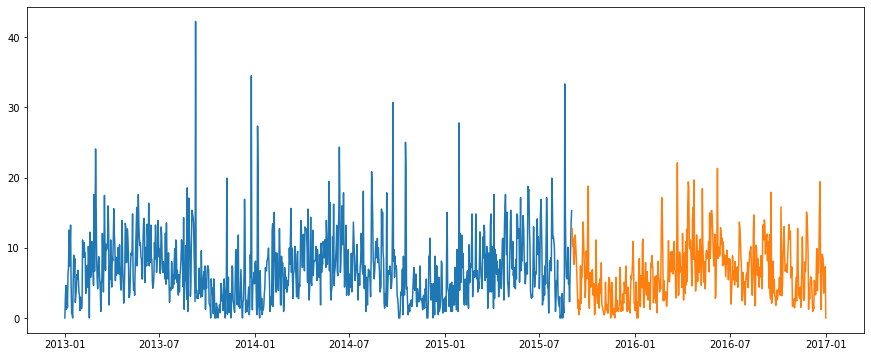

In [224]:
#Plotando
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)

In [234]:
#Criando modelo ARMA
arma22_train = ARMA(train_set, freq = 'D', order = (2,2)).fit()
arma22_train.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


const               6.912793
ar.L1.wind_speed    1.212280
ar.L2.wind_speed   -0.223550
ma.L1.wind_speed   -0.874822
ma.L2.wind_speed   -0.069501
dtype: float64

In [236]:
#Criando modelo ARMA
arma22_test = ARMA(test_set, freq = 'D', order = (2,2)).fit(arma22_train.params)
(arma22_test.resid **2).mean()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


10.884654553985069

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


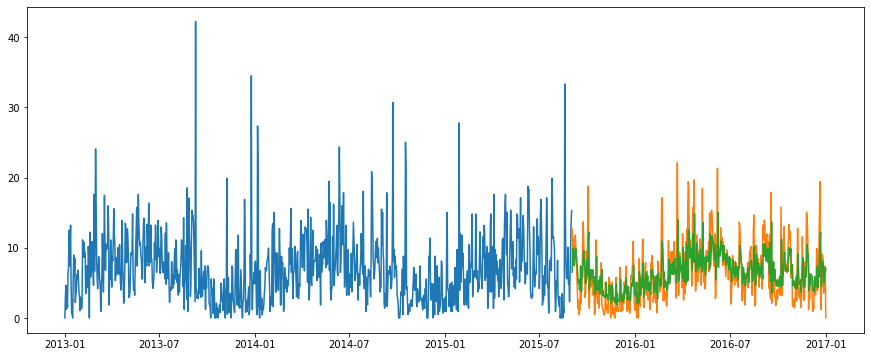

In [237]:
#Plotando
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set) 
plt.plot(arma22_test.predict()) 

In [238]:
#Modelos Treinamento
arma11_train = ARMA(train_set, freq = 'D', order=(1,1)).fit() 
arma22_train = ARMA(train_set, freq = 'D', order=(2,2)).fit() 
arma33_train = ARMA(train_set, freq = 'D', order=(3,3)).fit() 

In [241]:
#Teste
arma11_test = ARMA(test_set, freq = 'D', order=(1,1)).fit(arma11_train.params) 
arma22_test = ARMA(test_set, freq = 'D', order=(2,2)).fit(arma22_train.params) 
arma33_test = ARMA(test_set, freq = 'D', order=(3,3)).fit(arma33_train.params)

In [244]:
#Erro quadrático
print((arma11_test.resid ** 2).mean())    
print((arma22_test.resid ** 2).mean())
print((arma33_test.resid ** 2).mean())

11.453649276156254
10.884654553985069
10.82527768142775


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


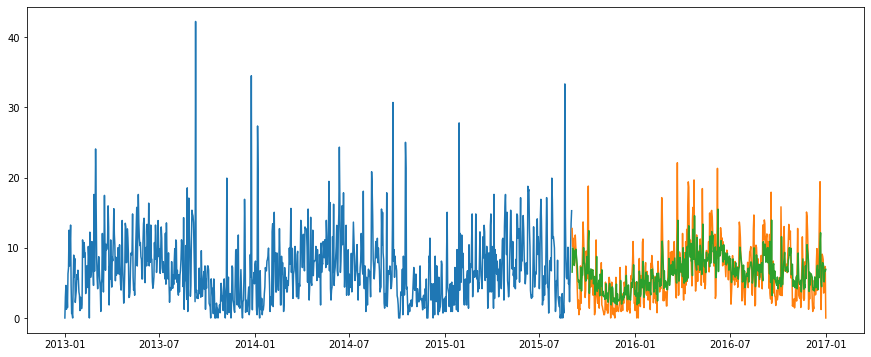

In [250]:
#Plotando arma33 com melhor performace
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set) 
plt.plot(arma33_test.predict()) 

In [249]:
#Testes de configurações e retornar as melhores
#melhor modelo arma33
configs = [(2,0), (3,0), (4,0), (2,1), (2,2), (3,1), (3,2), (3,3)]
best = 100000
for config in configs:
  arma=ARMA(train_set, freq = 'D', order=config).fit()
  arma_test = ARMA(test_set, freq = 'D',order = config).fit(arma.params)
  erro= (arma_test.resid ** 2). mean()
  if erro < best:
    best = erro
    print(config, erro)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(2, 0) 11.456824790765971
(3, 0) 11.247260534122454
(4, 0) 11.158787279174705
(2, 1) 11.023013199709114
(2, 2) 10.884654553985069
(3, 3) 10.82527768142775


###FIM!
